**Introduction to Analyzing E-Commerce Conversion Dynamics**

The rise of the Internet has significantly transformed shopping behaviors, with a steady increase in online consumers. However, despite these promising opportunities, companies, especially startups, face a critical challenge: understanding what drives a website visitor to make a purchase or abstain from it. As the marketing department of an e-commerce startup, our main objective is to increase revenue by optimizing strategies for promotion, pricing, and personalization. This study focuses on analyzing the behavior of website visitors to understand the customer's decision to make a purchase or not. The goal is to uncover the factors and contexts influencing the conversion of visitors into buyers. We aim to answer a fundamental question: what factors influence whether a website visit results in a purchase or not?

**To explore this, we consider three key research questions:**

1) What is the relationship between features related to timing (weekend, month, and special day) and revenue generation?

2) Does the type of visitor (new, returning, or other) impact the decision to purchase?

3) How do certain web metrics (Bounce Rates, Administrative Duration, Page Value, and Product-Related metrics) influence revenue generation?

**Justification and Source of Dataset**

To address these questions, we use the Online Shoppers Purchasing Intention Dataset from the UC Irvine Machine Learning Repository. This dataset was specifically designed to capture user behaviors during unique sessions on an e-commerce website over a one-year period, avoiding any bias related to specific campaigns, user profiles, or periods. It contains 18 variables (10 numeric and 8 categorical) and 12,330 observations, each representing a user session. The dataset includes variables such as time spent on different sections of the website, Google Analytics metrics (bounce rate, page value), the month and weekday of the session, as well as technical information like the browser and operating system used. The target variable is binary, indicating whether a purchase was made (True) or not (False). This dataset, well-balanced in terms of data quality, allows for a detailed exploration of purchasing behaviors and serves as an ideal foundation for developing predictive models using Machine Learning algorithms, with practical applications for optimizing marketing strategies.

**The numeric variables are:**

**Administrative:** Number of pages visited by the visitor related to account management.

**Administrative Duration:** Total amount of time (in seconds) spent by the visitor on account management-related pages.

**Informational:** Number of pages visited by the visitor related to website communication and address information.

**Informational Duration:** Total amount of time (in seconds) spent by the visitor on informational pages.

**Product Related:** Number of pages visited by the visitor related to product-related pages.

**Product-Related Duration:** Total amount of time (in seconds) spent by the visitor on product-related pages.

**Bounce Rate:** Average bounce rate value of the pages visited by the visitor.

**Exit Rate:** Average exit rate value of the pages visited by the visitor.

**Page Value:** Average page value of the pages visited by the visitor.

**Special Day:** Closeness of the site visit time to a special day.

**The categorical variables are:**

**Operating System:** Operating system of the visitor.

**Browser:** Browser of the visitor.

**Region:** Geographic region from which the session has been initiated by the visitor.

**Traffic Type:** Traffic source by which the visitor arrived at the website (e.g., banner, SMS, direct).

**Visitor Type:** Whether the visitor is a New Visitor, a Returning Visitor, or Other.

**Weekend:** Whether the date of the visit is on a weekend.

**Month:** Month of the visit.
Revenue: Whether the visit has been finalized with a transaction.


We will see that, during this analysis, there is indeed a strong link between certain variables, such as 'BounceRate', which strongly influence the decision to purchase after a visit to the website. We will also explore several other variables. We were able to create a model explaining this with an accuracy of 73% for the decision to buy or not on the website.

In [34]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file into a dataframe
data = pd.read_csv("/content/online_shoppers_intention.csv")

#Display the first few rows to check the loading
print(data.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [36]:
print(data.describe(include='all'))


        Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN           

In [37]:
import pandas as pd

# Load the dataset (assuming it's in the same directory as the notebook)
data = pd.read_csv("/content/online_shoppers_intention.csv")

# Count the occurrences of True and False in the 'Revenue' column
true_count = data['Revenue'].sum()  # Summing booleans treats True as 1 and False as 0
false_count = len(data) - true_count

print(f"Number of True values (purchases): {true_count}")
print(f"Number of False values (no purchases): {false_count}")

Number of True values (purchases): 1908
Number of False values (no purchases): 10422


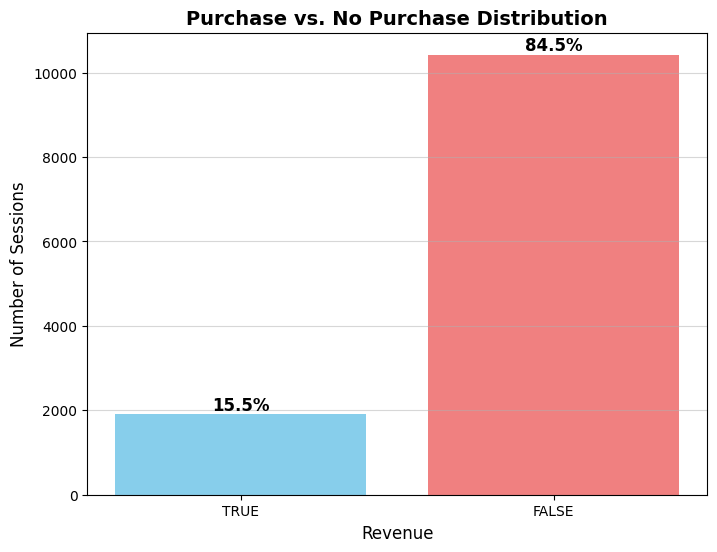

,Category,Count,Percentage
0,TRUE,1908,15.5%
1,FALSE,10422,84.5%


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe 'data' and the counts 'true_count' and 'false_count' are already defined as in the previous code.

# Create the bar plot
labels = ['TRUE', 'FALSE']
counts = [true_count, false_count]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'lightcoral'])

# Add percentage labels on top of each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    percentage = (count / len(data)) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.title('Purchase vs. No Purchase Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)  # Add a subtle grid for better readability
plt.show()


# Create the percentage table as a DataFrame
percentage_data = {'Category': ['TRUE', 'FALSE'],
                   'Count': [true_count, false_count],
                   'Percentage': [(true_count / len(data)) * 100, (false_count / len(data)) * 100]}
percentage_df = pd.DataFrame(percentage_data)

# Style the DataFrame to highlight percentages
styled_df = percentage_df.style.format({'Percentage': '{:.1f}%'}).set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]},  # Center headers
                       {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
                       {'selector': 'td:nth-child(3)', 'props': [('font-weight', 'bold'), ('color', 'darkblue'), ('background-color', '#f2f2f2')]}, # Style Percentage column

                       ])


display(styled_df)

We can see that a large portion of visits to the website do not result in a purchase. In fact, 84.5% of visitors do not make a purchase, while only 15.5% of them do. There is therefore a real challenge in trying to convert visitors into customers. We will begin by analyzing time-related variables, such as the distribution of revenue across the different months of the year, whether purchases are made on weekends or not, and finally the impact of special days on purchases. We have the 'revenue' variable available, which indicates whether the person makes a purchase or not at the end of the visit. It is noticeable that the majority of visits do not result in a sale.

**We start with the descriptive analysis:**


**ANSWER TO QUESTION 1: What is the relationship between features related to timing (weekend, month, and special day) and revenue generation?**

**We analyze the "Weekend" variable to examine the distribution of orders throughout the week and assess the impact of weekends, determining whether it can be a determining factor.**

In [39]:
data['Weekend'].value_counts()

,count
Weekend,
False,9462
True,2868


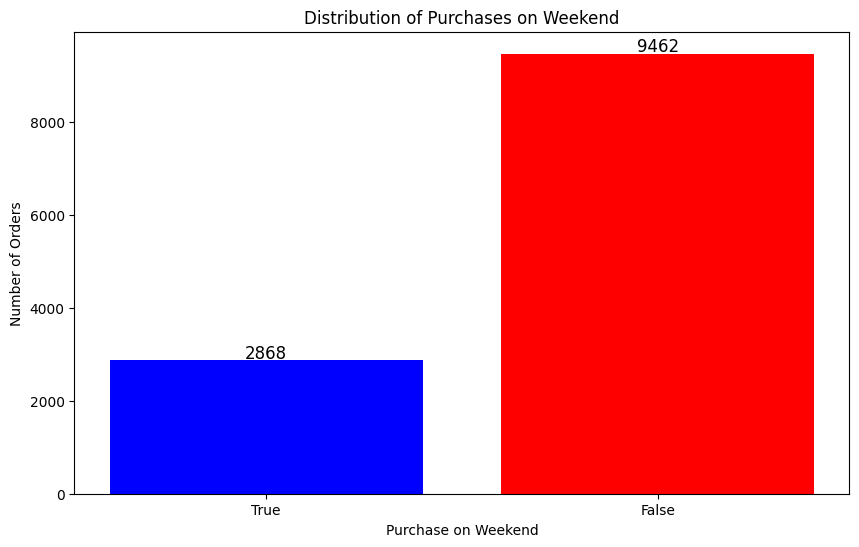

In [40]:
import matplotlib.pyplot as plt

# Data
true_values = 2868
false_values = 9462

# Create data for the chart
data = {'True': true_values, 'False': false_values}
categories = list(data.keys())
values = list(data.values())

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, values, color=['blue', 'red'])

# Customize the chart
ax.set_xlabel('Purchase on Weekend')
ax.set_ylabel('Number of Orders')
ax.set_title('Distribution of Purchases on Weekend')

# Display values above the bars
for i in range(len(categories)):
    plt.text(x=i, y=values[i]+50, s=str(values[i]), ha='center', size=12)

# Display the chart
plt.show()


In [41]:
# Total number of orders
total_orders = 9462 + 2868

# Number of orders on the weekend
weekend_orders = 2868

# Calculate the percentage of orders on the weekend
weekend_percentage = (weekend_orders / total_orders) * 100

# Display the result
print(f"The percentage of orders made on the weekend is: {weekend_percentage:.2f}%")


The percentage of orders made on the weekend is: 23.26%


Weekends, with 23.26% of orders, present a strong potential to increase sales through targeted promotions or other marketing strategies.

**Now let's look at the "Month" variable.**

In [42]:
import pandas as pd

# Reload your original DataFrame
data = pd.read_csv("/content/online_shoppers_intention.csv")  # Replace with your actual file path

# Now you can access the 'Month' column
data['Month'].value_counts()

,count
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288


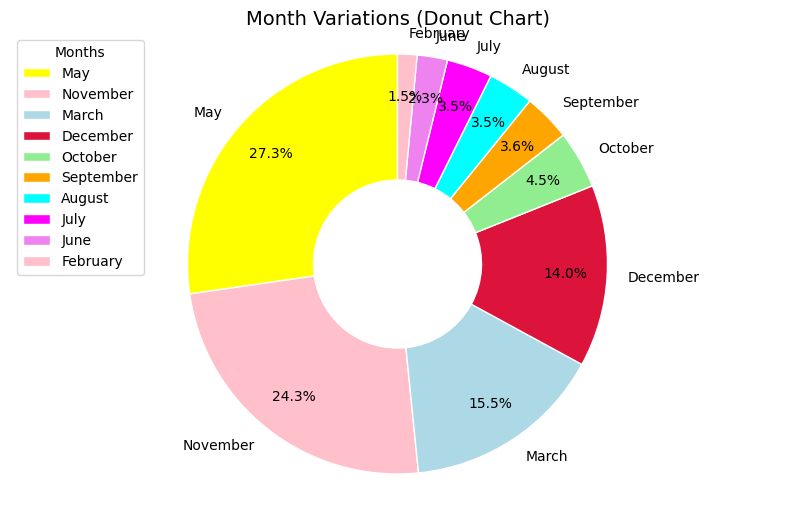

In [43]:
import matplotlib.pyplot as plt

# Data for month variations
size = data['Month'].value_counts()
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"

# Define donut hole radius
hole_radius = 0.4  # Adjust value between 0 and 1 to control the hole size

# Create the donut chart
plt.figure(figsize=(10, 6))
plt.pie(size, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, pctdistance=0.8, wedgeprops=dict(width=0.6, edgecolor='w'))  # Adjust wedgeprops for width and edge color

# Add title
plt.title('Month Variations (Donut Chart)', fontsize=14)

# Remove unnecessary elements
plt.axis('equal')  # Equal aspect ratio for a circular donut
plt.legend(loc='upper left', title='Months')  # Adjust legend placement

plt.show()

We can see that the months of January and April do not appear because we did not have any precise values, only zeros. It would be interesting to understand why, whether it's due to website maintenance or other reasons. It would be preferable to reach out to the data engineer internally, for example, to get clearer explanations. Therefore, we will not analyze the months of January and April.

Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86
Revenue      False      True 
Month                        
Aug      82.448037  17.551963
Dec      87.492762  12.507238
Feb      98.369565   1.630435
Jul      84.722222  15.277778
June     89.930556  10.069444
Mar      89.931830  10.068170
May      89.149822  10.850178
Nov      74.649767  25.350233
Oct      79.052823  20.947177
Sep      80.803571  19.196429


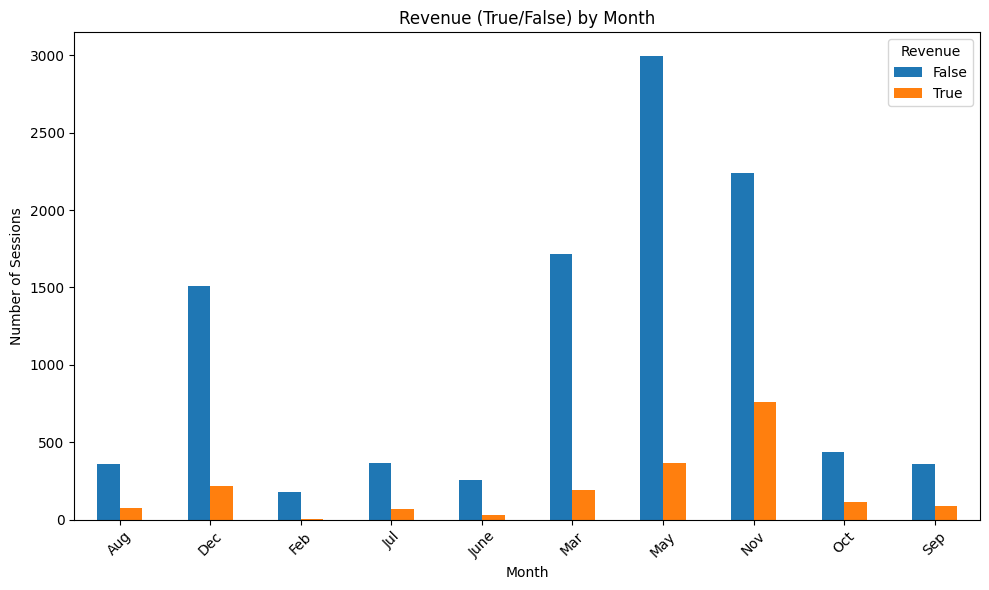

In [44]:
# Group data by month and revenue, then count occurrences
month_revenue_counts = data.groupby(['Month', 'Revenue']).size().unstack(fill_value=0)

month_order = ['February', 'March', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

# Display the counts
print(month_revenue_counts)

# Calculate the percentage table
monthly_revenue_percentage = month_revenue_counts.div(month_revenue_counts.sum(axis=1), axis=0) * 100

# Display the percentage table
print(monthly_revenue_percentage)

# Plotting the results (optional)
month_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue (True/False) by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()


Based on this bar chart, we realize there is a huge lost opportunity in May, with 2999 visits that did not result in a purchase, compared to only 365 visits that led to a purchase. It would therefore be advisable to implement promotional offers to convert as many visitors as possible into buyers, thus increasing revenue.

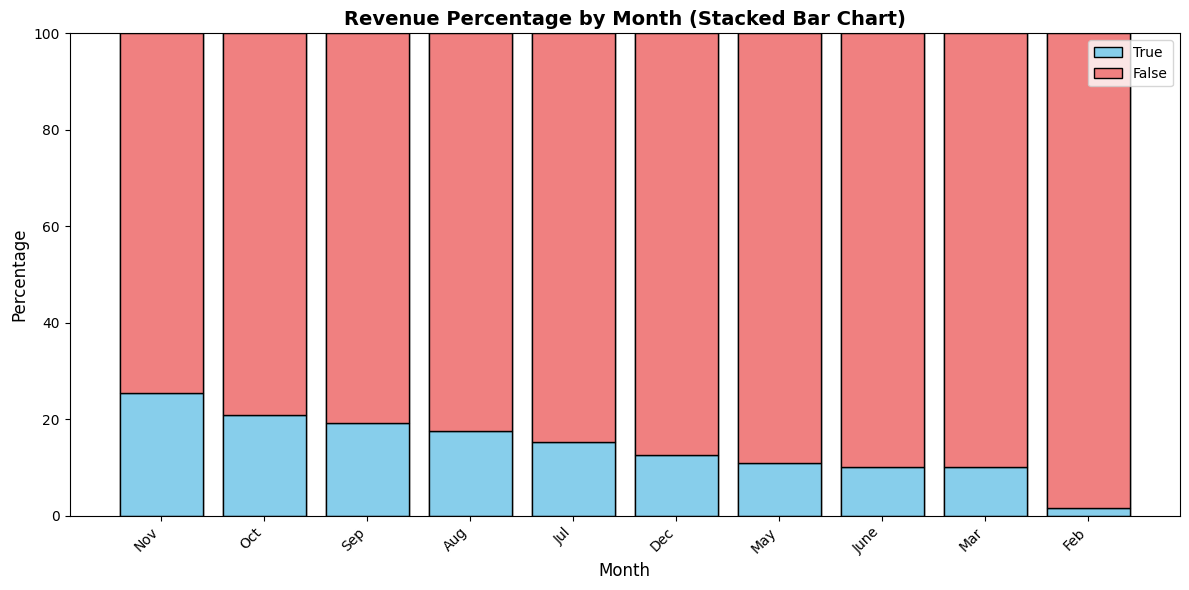

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming monthly_revenue_percentage is already calculated

# Sort by the 'True' column, accessing it correctly
sorted_data = monthly_revenue_percentage.sort_values(by=[True], ascending=False)  # Access True as a boolean, not a string

months = sorted_data.index
true_percentages = sorted_data[True]  # Access True as a boolean
false_percentages = sorted_data[False]  # Access False as a boolean

# Create the bar plot
plt.figure(figsize=(12, 6))

# Initialize bars at 100%
for month, true_pct, false_pct in zip(months, true_percentages, false_percentages):
    plt.bar(month, 100, color='lightgray', edgecolor='black', linewidth=1)  # Base bar
    plt.bar(month, true_pct, color='skyblue', edgecolor='black', linewidth=1, label='True' if month == months[0] else "")  # True portion
    plt.bar(month, false_pct, bottom=true_pct, color='lightcoral', edgecolor='black', linewidth=1, label='False' if month == months[0] else "") # False portion on top

# Customize the plot
plt.xlabel("Month", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Revenue Percentage by Month (Stacked Bar Chart)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

**In this bar plot**, we can see that the month with the best conversion rate is November. Therefore, it is important to analyze why this month has the highest conversion rate, in order to implement promotional offers or other strategies to increase traffic on the site. The goal would be to maintain this conversion rate on a larger scale.

Counts:
 Revenue     False  True 
SpecialDay              
0.0          9248   1831
0.2           164     14
0.4           230     13
0.6           322     29
0.8           314     11
1.0           144     10

Proportions:
 Revenue         False      True 
SpecialDay                      
0.0         83.473238  16.526762
0.2         92.134831   7.865169
0.4         94.650206   5.349794
0.6         91.737892   8.262108
0.8         96.615385   3.384615
1.0         93.506494   6.493506


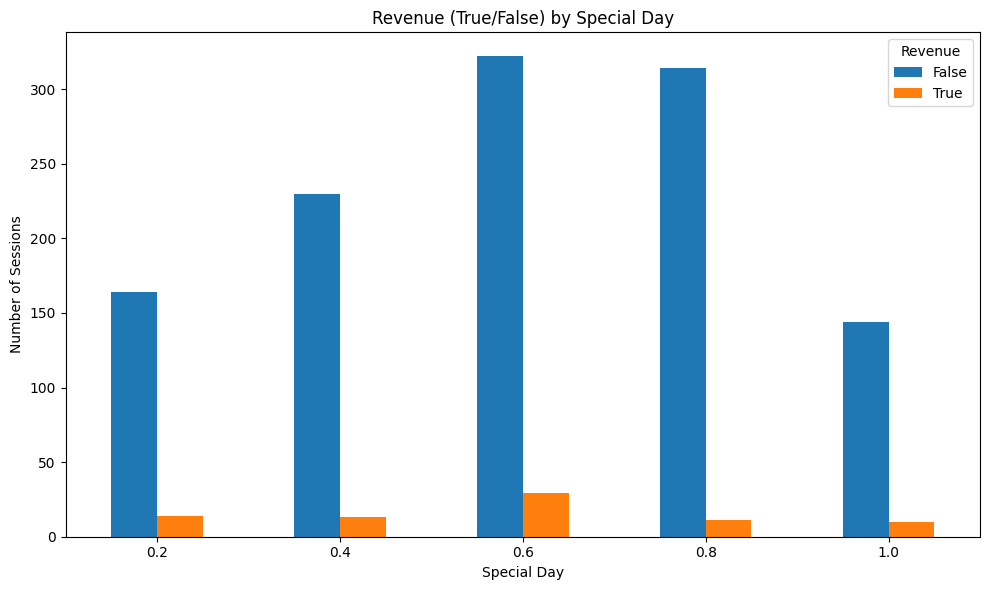

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/online_shoppers_intention.csv")

# Group the data by 'SpecialDay' and 'Revenue', then count occurrences
special_day_revenue = data.groupby(['SpecialDay', 'Revenue']).size().unstack(fill_value=0)

# Calculate proportions
special_day_proportions = special_day_revenue.div(special_day_revenue.sum(axis=1), axis=0) * 100

# Display counts and proportions
print("Counts:\n", special_day_revenue)
print("\nProportions:\n", special_day_proportions)

# Filter the rows where 'SpecialDay' is equal to 0.0
special_day_revenue_filtered = special_day_revenue[special_day_revenue.index != 0.0]

# Display the chart with the filtered data
special_day_revenue_filtered.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue (True/False) by Special Day')
plt.xlabel('Special Day')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=0)  # No rotation for better readability of SpecialDay values
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()


We remove the 0.0 bar because it skews the graph. We can now see the values in more detail.

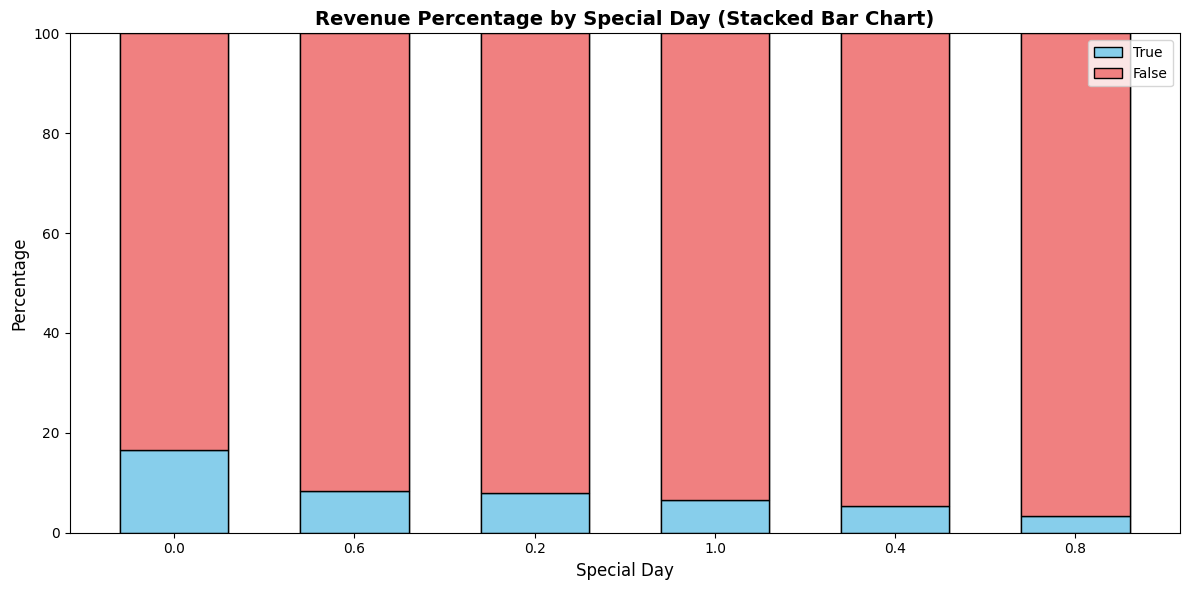

In [47]:
# Assuming special_day_proportions is already calculated as in the previous code

# Sort by the 'True' column in descending order
sorted_special_day_proportions = special_day_proportions.sort_values(by=True, ascending=False)

special_days = sorted_special_day_proportions.index
true_percentages = sorted_special_day_proportions[True]
false_percentages = sorted_special_day_proportions[False]

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.6  # Adjust bar width for spacing

# Initialize bars at 100%
for i, (special_day, true_pct, false_pct) in enumerate(zip(special_days, true_percentages, false_percentages)):
    plt.bar(i, 100, color='lightgray', edgecolor='black', linewidth=1, width=bar_width)  # Base bar
    plt.bar(i, true_pct, color='skyblue', edgecolor='black', linewidth=1, width=bar_width, label='True' if i == 0 else "")  # True portion
    plt.bar(i, false_pct, bottom=true_pct, color='lightcoral', edgecolor='black', linewidth=1, width=bar_width, label='False' if i == 0 else "")  # False portion

# Customize the plot
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Revenue Percentage by Special Day (Stacked Bar Chart)", fontsize=14, fontweight='bold')
plt.xticks(range(len(special_days)), special_days, rotation=0) # Set x-ticks with special day values
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency, pointbiserialr

# Reload the original data from the CSV file
original_data = pd.read_csv("/content/online_shoppers_intention.csv")  # Use a different variable name to avoid conflict

# Function to perform Chi-squared test and Point-Biserial correlation
def analyze_temporal_impact(df, column_name):
    contingency_table = pd.crosstab(df[column_name], df['Revenue'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {column_name}:")
    print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}")

# Analyze 'Month'
analyze_temporal_impact(original_data, 'Month')  # Use the original_data DataFrame

# Analyze 'Weekend'
analyze_temporal_impact(original_data, 'Weekend')  # Use the original_data DataFrame

# Analyze 'SpecialDay'
analyze_temporal_impact(original_data, 'SpecialDay')  # Use the original_data DataFrame

Chi-squared test for Month:
Chi2 = 384.935, p-value = 0.000
Chi-squared test for Weekend:
Chi2 = 10.391, p-value = 0.001
Chi-squared test for SpecialDay:
Chi2 = 96.077, p-value = 0.000


**Chi-square tests** show that temporal variables (Month, Weekend, Special Day) significantly influence customer revenue. The Month has the strongest impact (Chi2 = 384.935, p = 0.000), likely due to seasonal trends or promotions, followed by Special Days (Chi2 = 96.077, p = 0.000) and Weekends (Chi2 = 10.391, p = 0.001). These results suggest analyzing these specific periods to optimize marketing strategies and maximize sales.

**ANSWER TO QUESTION 2 : Does the type of visitor (new, returning, or other) impact the decision to purchase?**

Now, we answer question 2 and we will analyze the types of visitors. I remind you that there are 3 types of visitors: new visitors, returning visitors, and other visitors.

We have 3 different types of visitors. It is important to get a first impression of the data and an "overview" of what is happening in the dataset. We can make some hypotheses. It would be interesting to see if "returning visitors" are more likely to make a purchase or not.

In [49]:
data['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


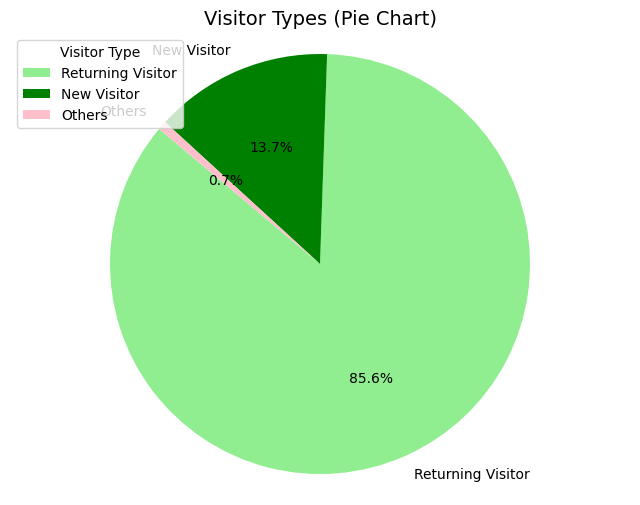

In [50]:
import matplotlib.pyplot as plt

# Data for visitor types
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(size, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)  # Adjust startangle for better visualization

# Add title and legend
plt.title('Visitor Types (Pie Chart)', fontsize=14)
plt.legend(loc='upper left', title='Visitor Type')  # Adjust legend placement

plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()

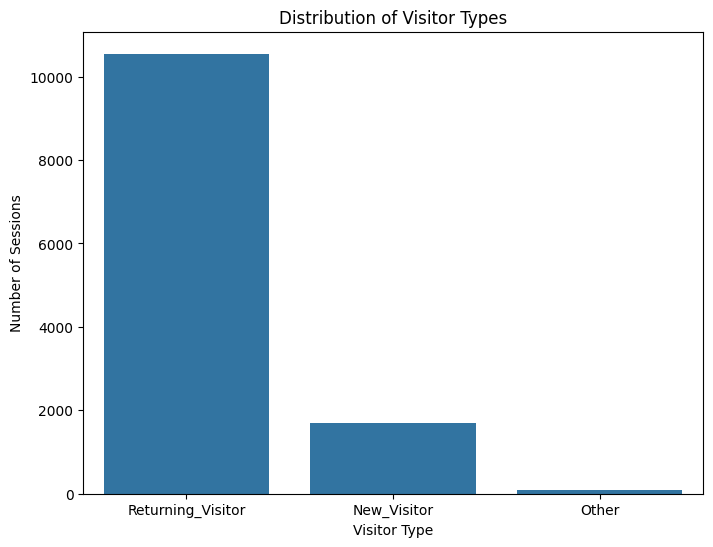

In [51]:
# Visualization of the distribution of visitor types
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', data=data)
plt.title('Distribution of Visitor Types')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Sessions')
plt.show()

**The analysis** of the data shows that the type of visitor appears to have a notable impact on revenue generation. New visitors, although fewer in number, tend to generate higher revenues compared to returning visitors, who have a lower likelihood of making a purchase. Visitors categorized as "other" show less predictable behavior, but the data suggests that they are less likely to generate sales. This reinforces the idea that targeted marketing based on visitor type could optimize business strategies. Further statistical analysis, such as Chi-Square tests or logistic regression, is needed to confirm these trends and better understand the influence of visitor type on conversion.

Revenue                False      True 
VisitorType                            
New_Visitor        75.088548  24.911452
Other              81.176471  18.823529
Returning_Visitor  86.067671  13.932329


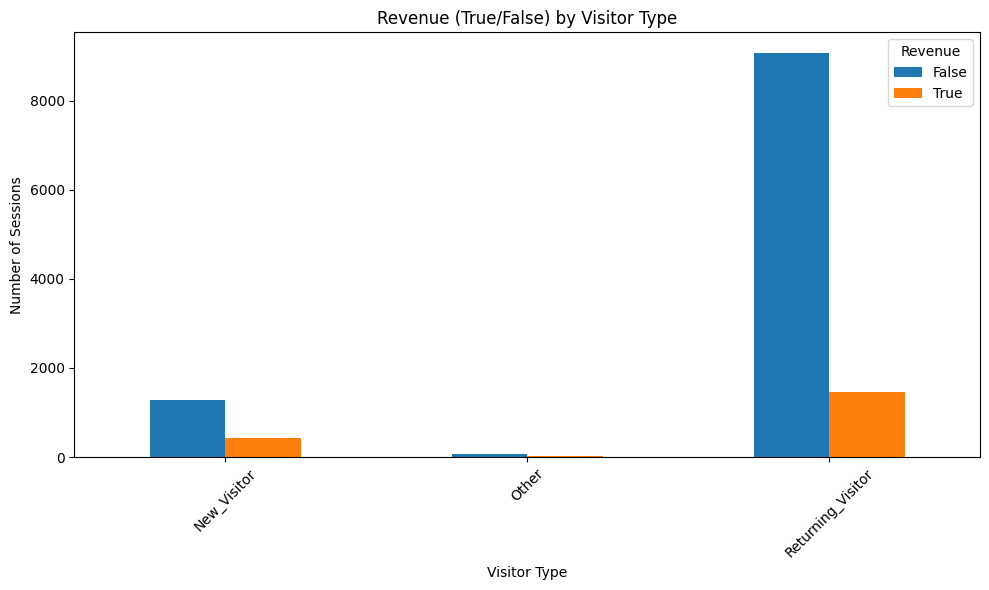

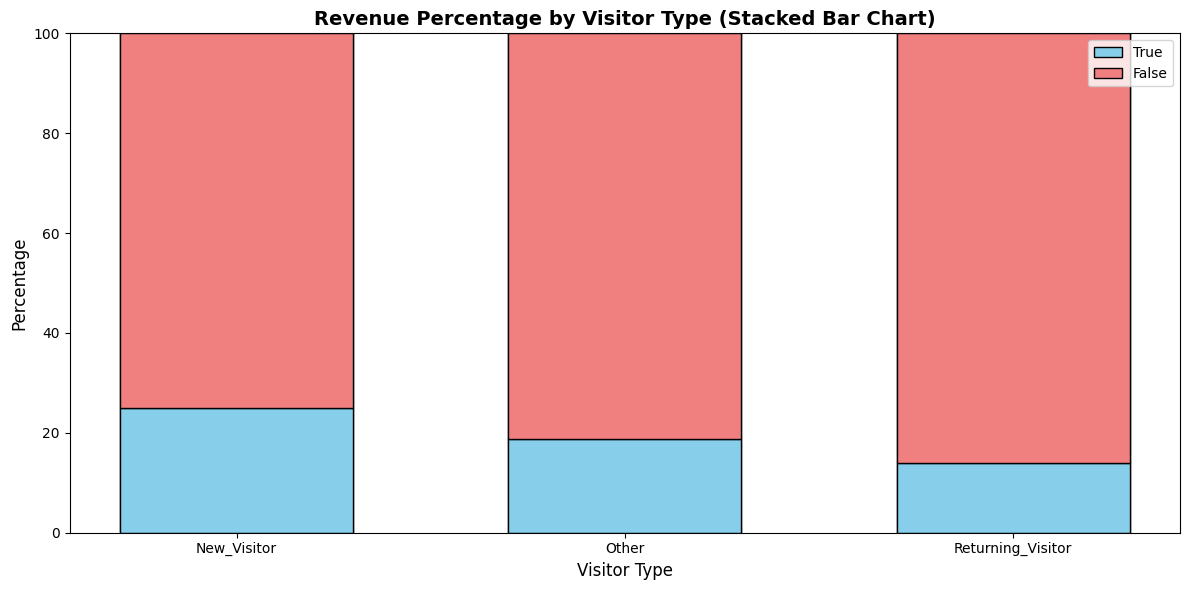

In [52]:
# Group data by VisitorType and Revenue, then count occurrences
visitor_revenue_counts = data.groupby(['VisitorType', 'Revenue']).size().unstack(fill_value=0)

# Calculate the percentage table
visitor_revenue_percentage = visitor_revenue_counts.div(visitor_revenue_counts.sum(axis=1), axis=0) * 100

# Display the percentage table
print(visitor_revenue_percentage)

# Plotting the results (optional)
visitor_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue (True/False) by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

# Assuming visitor_revenue_percentage is already calculated

# Sort by the 'True' column
sorted_visitor_data = visitor_revenue_percentage.sort_values(by=[True], ascending=False)

visitor_types = sorted_visitor_data.index
true_percentages = sorted_visitor_data[True]
false_percentages = sorted_visitor_data[False]


plt.figure(figsize=(12, 6))

bar_width = 0.6  # Adjust bar width for spacing

# Initialize bars at 100%
for i, (visitor_type, true_pct, false_pct) in enumerate(zip(visitor_types, true_percentages, false_percentages)):
    plt.bar(i, 100, color='lightgray', edgecolor='black', linewidth=1, width=bar_width)  # Base bar
    plt.bar(i, true_pct, color='skyblue', edgecolor='black', linewidth=1, width=bar_width, label='True' if i == 0 else "")  # True portion
    plt.bar(i, false_pct, bottom=true_pct, color='lightcoral', edgecolor='black', linewidth=1, width=bar_width, label='False' if i == 0 else "")  # False portion

# Customize the plot
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Revenue Percentage by Visitor Type (Stacked Bar Chart)", fontsize=14, fontweight='bold')
plt.xticks(range(len(visitor_types)), visitor_types, rotation=0)  # Set x-ticks with special day values
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

We see that the most frequent users are returning visitors, which is why promotional offers or email campaigns should be implemented to encourage them to make a purchase.

In [53]:
import pandas as pd
from scipy.stats import chi2_contingency  # Import the chi2_contingency function

# Contingency table for VisitorType and Revenue
contingency_table = pd.crosstab(data['VisitorType'], data['Revenue'])
print("\nContingency Table:\n", contingency_table)

# Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)  # Now chi2_contingency is defined
print(f"\nChi-Square Test Results:\nChi2: {chi2:.3f}, p-value: {p_value:.3f}, Degrees of Freedom: {dof}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant association between VisitorType and Revenue.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association between VisitorType and Revenue.")


Contingency Table:
 Revenue            False  True 
VisitorType                    
New_Visitor         1272    422
Other                 69     16
Returning_Visitor   9081   1470

Chi-Square Test Results:
Chi2: 135.252, p-value: 0.000, Degrees of Freedom: 2

Interpretation:
Reject the null hypothesis. There is a statistically significant association between VisitorType and Revenue.


**The Chi-squared** test result of 135.252 with a p-value less than 0.05 indicates a statistically significant relationship between the variables. This means the observed difference is not due to chance and there is a real relationship between the compared categories. As a result, we reject the null hypothesis. For example, this could suggest that factors like visitor type or month affect revenue. To fully understand the result, it's important to identify the specific variables tested.

**ANSWER TO QUESTION 3: How do certain web metrics (Bounce Rates, Administrative Duration, Page Value, and Product-Related metrics) influence revenue generation?** We now wish to create a correlation matrix to determine if there is a correlation between the factors we want to include in the revenue prediction model.

Indeed, we would like to select certain factors that influence revenue and verify that these factors are not correlated with each other, as this could lead to the problem of multicollinearity.

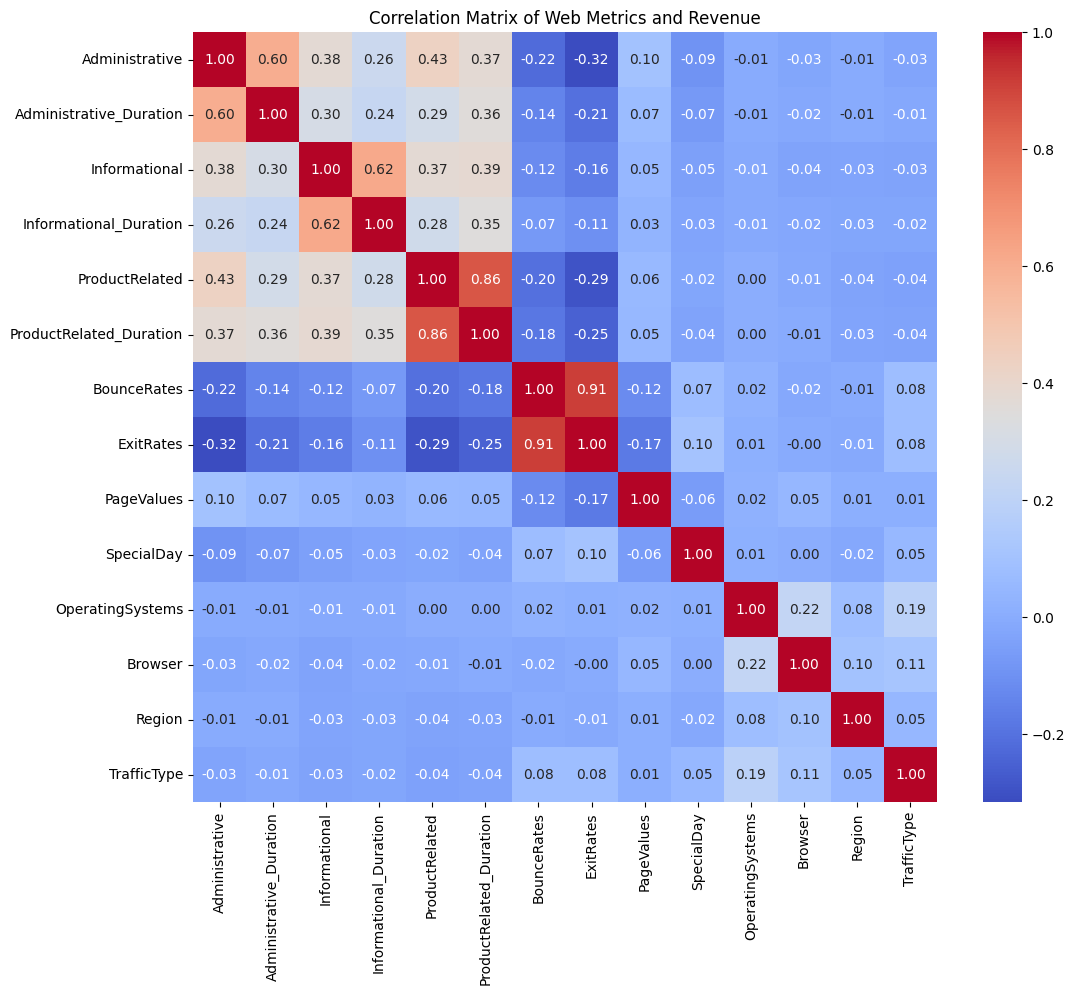


Point-Biserial Correlations:
BounceRates: Correlation = -0.151, p-value = 0.000
Administrative_Duration: Correlation = 0.094, p-value = 0.000
PageValues: Correlation = 0.493, p-value = 0.000
ProductRelated_Duration: Correlation = 0.152, p-value = 0.000

Correlation Interpretation:
BounceRates: Negative correlation with Revenue (p < 0.05). Lower BounceRates tends to be associated with increased Revenue.
Administrative_Duration: Positive correlation with Revenue (p < 0.05). Higher Administrative_Duration tends to be associated with increased Revenue.
PageValues: Positive correlation with Revenue (p < 0.05). Higher PageValues tends to be associated with increased Revenue.
ProductRelated_Duration: Positive correlation with Revenue (p < 0.05). Higher ProductRelated_Duration tends to be associated with increased Revenue.


In [54]:
# Correlation Matrix
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Web Metrics and Revenue')
plt.show()

# Statistical tests for significant correlations (e.g., point-biserial correlation)
print("\nPoint-Biserial Correlations:")
for metric in ['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated_Duration']:
    correlation, p_value = pointbiserialr(data[metric], data['Revenue'])
    print(f"{metric}: Correlation = {correlation:.3f}, p-value = {p_value:.3f}")

# Interpretation
alpha = 0.05
print("\nCorrelation Interpretation:")
for metric in ['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated_Duration']:
    correlation, p_value = pointbiserialr(data[metric], data['Revenue'])
    if p_value < alpha:
        if correlation > 0:
            print(f"{metric}: Positive correlation with Revenue (p < {alpha}). Higher {metric} tends to be associated with increased Revenue.")
        else:
            print(f"{metric}: Negative correlation with Revenue (p < {alpha}). Lower {metric} tends to be associated with increased Revenue.")
    else:
        print(f"{metric}: No significant correlation with Revenue (p >= {alpha}).")

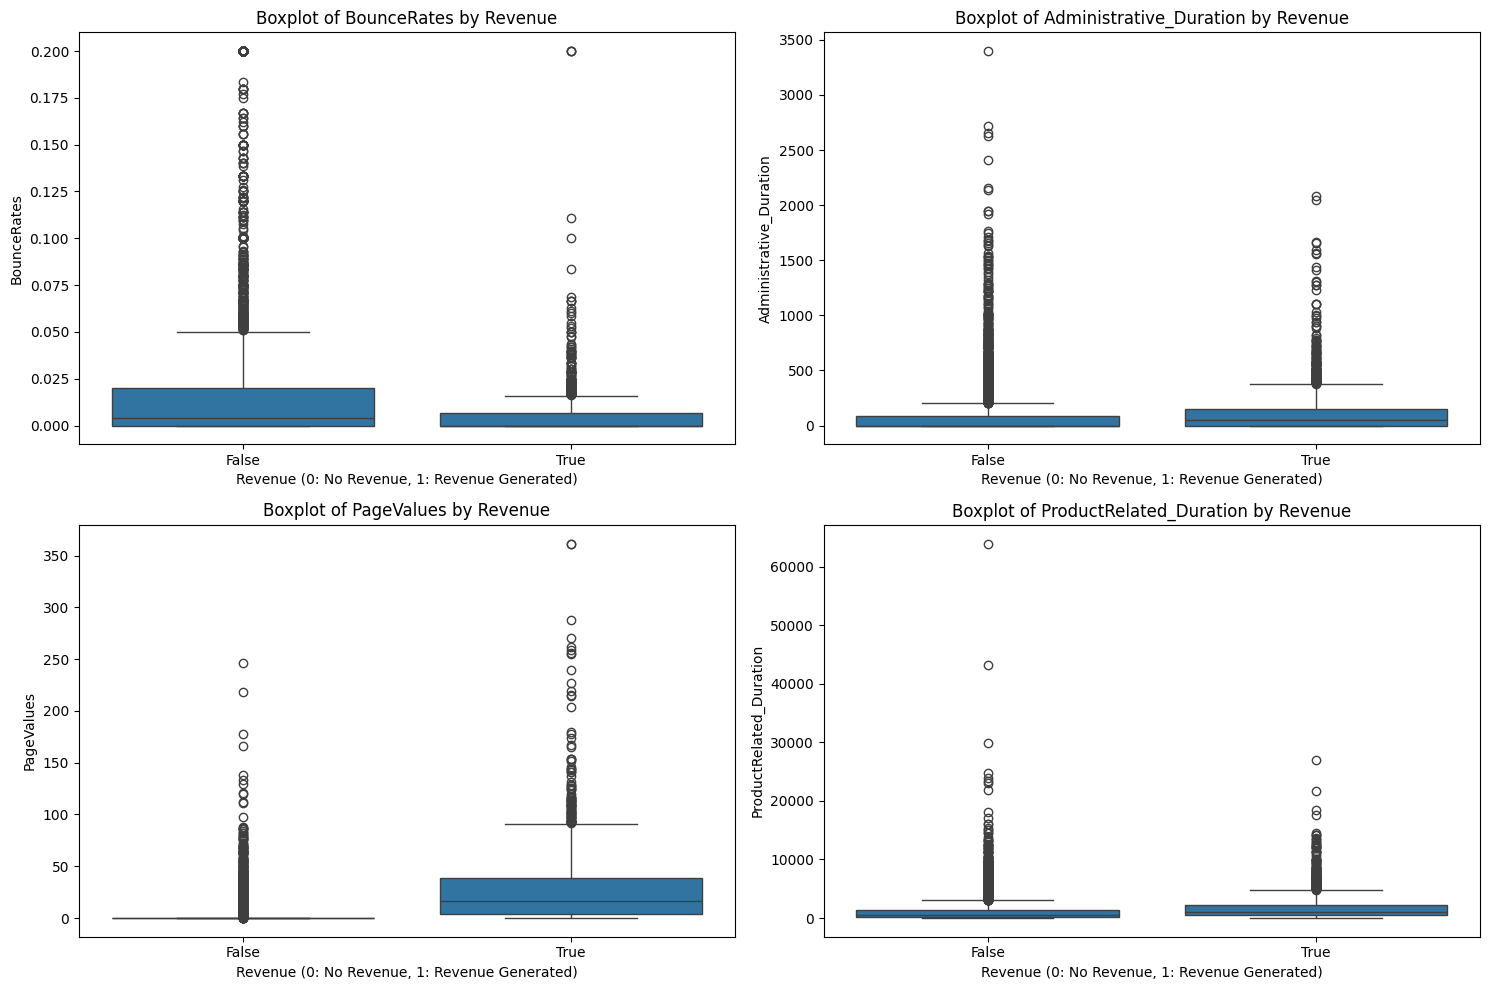

In [55]:
# Boxplots for web metrics vs. revenue
metrics = ['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated_Duration']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Revenue', y=metric, data=data)
    plt.title(f'Boxplot of {metric} by Revenue')
    plt.xlabel('Revenue (0: No Revenue, 1: Revenue Generated)')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

**The boxplots** and correlation matrix analysis reveal that visitors who generate revenue tend to have lower bounce rates, higher page values, and spend more time on product pages. These metrics are strongly associated with increased revenue, while time spent on administrative pages does not significantly impact conversions. These findings suggest that improving page value and reducing bounce rates are crucial for optimizing conversion rates.

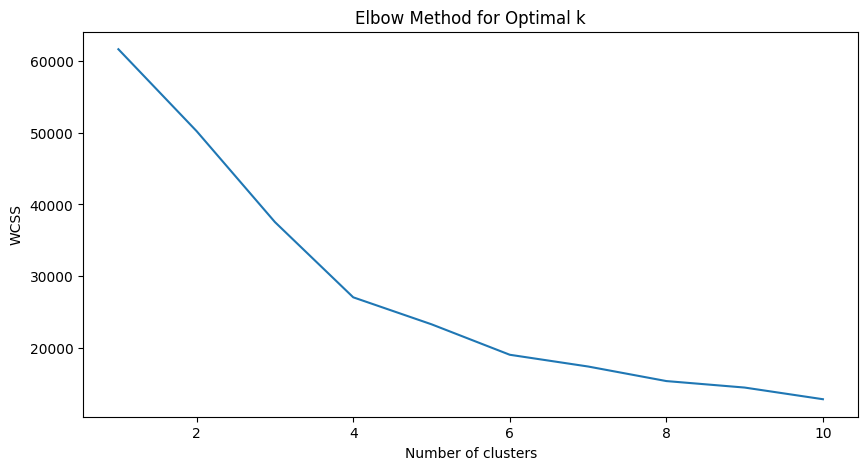

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features_for_clustering = ['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated_Duration', 'Revenue']
X = data[features_for_clustering]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As the elbow plot suggests, the first two principal components explain over 60% of the total variations. Thus, for the next part, we will investigate how the four variables are associated with the first two principal components. To visualize the relationship, we create the following biplot with data points colored by whether there is revenue generated.

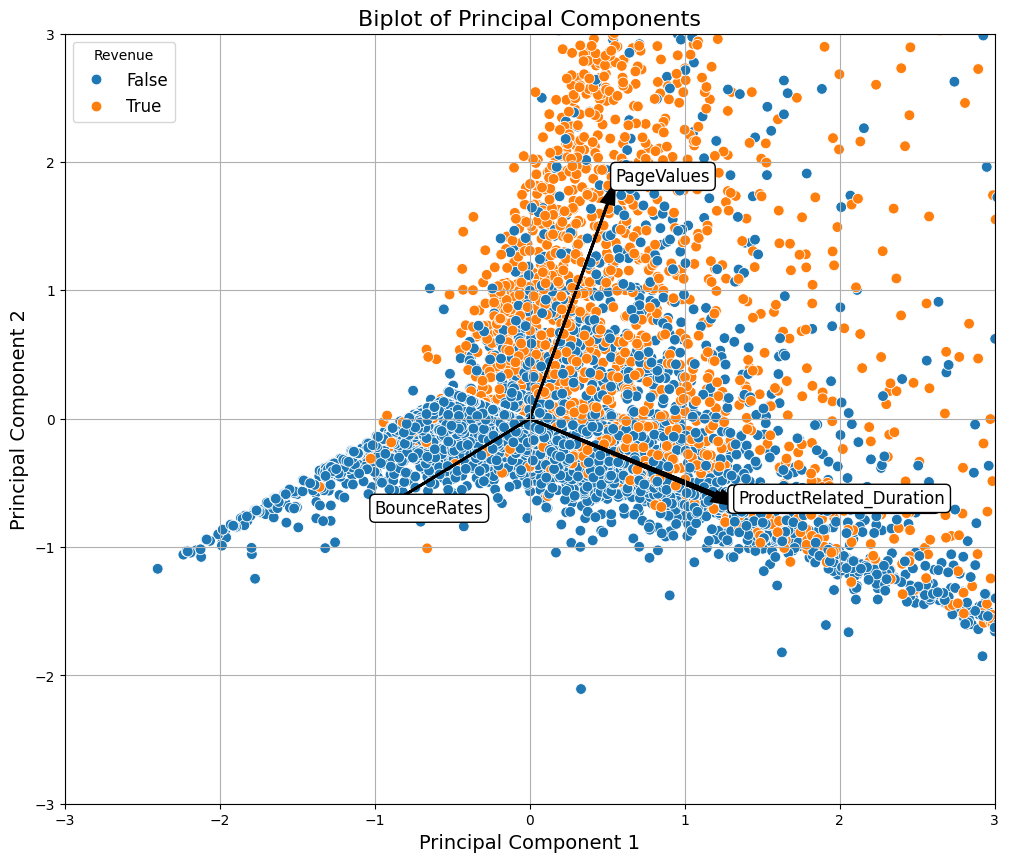

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features for PCA
features_for_pca = ['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated_Duration']
X = data[features_for_pca]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components and revenue
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Revenue'] = data['Revenue']

# Biplot
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility

# Plot data points colored by revenue
sns.scatterplot(x='PC1', y='PC2', hue='Revenue', data=pca_df, s=60)  # Increased marker size

# Plot variable loadings
for i, feature in enumerate(features_for_pca):
    plt.arrow(0, 0,
              pca.components_[0, i] * 2,  # Scale arrows for better visibility
              pca.components_[1, i] * 2,
              head_width=0.08, head_length=0.15, fc='k', ec='k', linewidth=2)  # Increased arrow thickness
    plt.text(pca.components_[0, i] * 2.2, pca.components_[1, i] * 2.2, feature,
             fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))  # Add a background box

# Labels, title, and legend
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('Biplot of Principal Components', fontsize=16)
plt.legend(title='Revenue', loc='best', fontsize=12)  # Improved legend

# Zoom to better focus on the plots
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add grid for readability
plt.grid(True)

# Display the plot
plt.show()


**The biplot** shows that high values of the second principal component are associated with an increased likelihood of generating revenue. BounceRates are negatively correlated with both principal components, while PageValues are positively correlated. The relationships with Administrative_Duration and ProductRelated are less clear. In summary, revenue-generating visits are characterized by low BounceRates and high PageValues.

**Analysis** of web metrics reveals their significant impact on revenue generation. Low bounce rates and high page values are key indicators, positively correlated with conversions, while time spent on product-related pages further reinforces this trend. Conversely, administrative duration does not appear to be a determining factor. Visitor type is also crucial: new visitors show a higher likelihood of making a purchase compared to returning visitors. PCA analysis confirms these observations by segmenting visitors based on purchasing behaviors and visualizing the relationships between metrics. To optimize revenue, businesses should focus on enhancing user experience to reduce bounce rates, promoting high-value pages, and implementing retention strategies for existing customers while specifically targeting new visitors with attractive offers.

**MODEL CONSTRUCTION**

**FIRST MODEL - LOGISTIC REGRESSION**

We now wish to predict the revenue. Revenue is defined as a binary variable that takes the value TRUE or FALSE.

--> TRUE means that the website visit ended with a purchase.

--> FALSE indicates that the website visit did not end with a purchase.

We would like to understand which factors influence whether or not a purchase is made at the end of the visit.

That’s why we take the variables 'PageValues', 'BounceRates', 'ProductRelated_Duration', 'Administrative', 'Month', 'Weekend', 'SpecialDay', 'VisitorType'.

We choose to use 'BounceRates' as an explanatory factor and exclude 'ExitRates' from the explanatory factors because 'ExitRates' and 'BounceRates' are strongly correlated at 0.91 and cannot both be included in the model. That’s why we exclude 'ExitRates' and keep only 'BounceRates'.

Next, for the numerical factors, we checked that they are not correlated with each other. In fact, the highest correlation between two factors is 0.3, which is relatively low and does not prevent us from using both as explanatory factors in the regression model.

We will now perform the regression to explain Revenue using 'PageValues', 'BounceRates', 'ProductRelated_Duration', 'Administrative', 'Month', 'Weekend', 'SpecialDay', 'VisitorType'.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation - Logistic Regression
              precision    recall  f1-score   support

       False       0.88      0.97      0.93      2055
        True       0.73      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.69      2466
weighted avg       0.85      0.87      0.85      2466



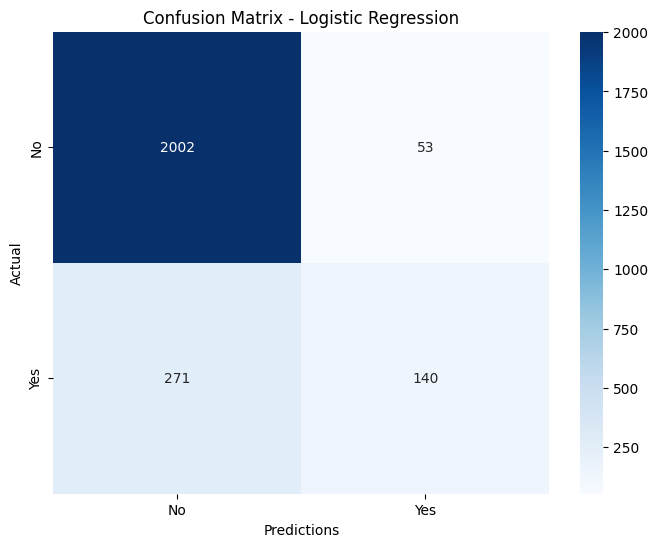

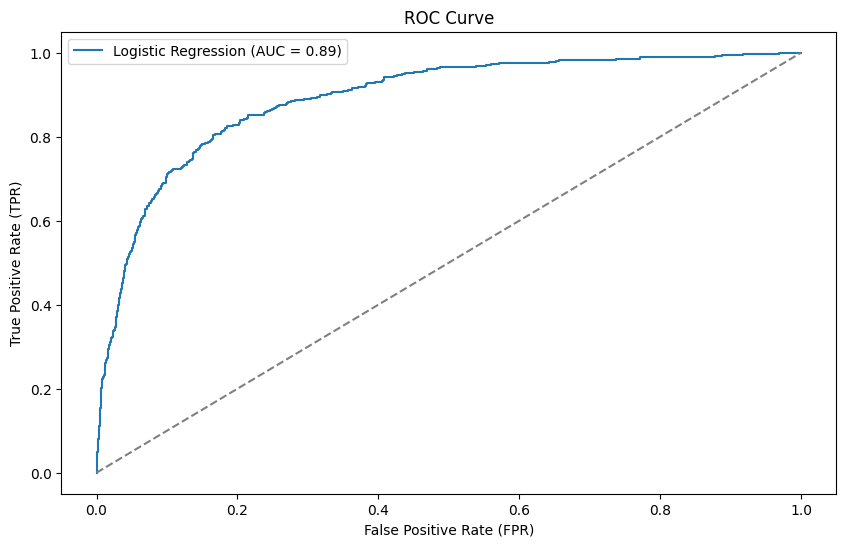

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("/content/online_shoppers_intention.csv")

# Encode categorical variables
label_encoder = LabelEncoder()

# Encoding the 'Month' column (Month is a categorical variable)
data['Month'] = label_encoder.fit_transform(data['Month'])

# Encoding 'VisitorType' and 'Weekend' (Boolean or categorical variables)
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Weekend'] = data['Weekend'].astype(int)  # Convert 'Weekend' to integer (0 or 1)

# Separate features and target variable
X = data[['PageValues', 'BounceRates', 'ProductRelated_Duration', 'Administrative', 'Month', 'Weekend', 'SpecialDay', 'VisitorType']]
y = data['Revenue']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Evaluation - Logistic Regression")
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()


**The logistic regression model** shows uneven performance between the "purchase" and "no purchase" classes. It has a precision of 0.88 for the "False" (no purchase) class, but only 0.73 for the "True" (purchase) class, indicating more errors for purchases. The recall for "False" is very high (0.97), but low for "True" (0.34), suggesting the model struggles to identify buyers. The F1 score is high for "False" (0.93) but low for "True" (0.46). The overall accuracy is 0.87, but it is biased by correctly predicting non-buyers. The AUC of 0.89 indicates good discrimination between the two classes, but improvements are needed to better predict potential buyers, such as adjusting thresholds or optimizing the model's parameters.

**We want to test another model to determine if it predicts better than logistic regression. Therefore, we will implement a Random Forest to predict revenue.**

**SECOND MODEL - RANDOM FOREST**

Evaluation - Random Forest
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2055
        True       0.71      0.56      0.63       411

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466



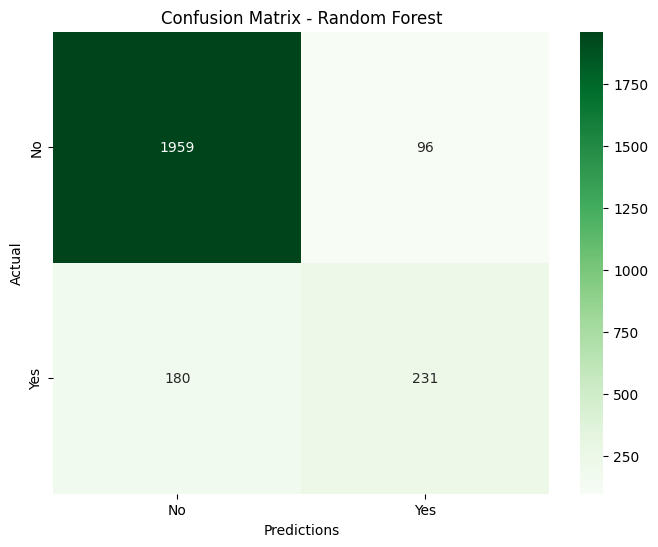

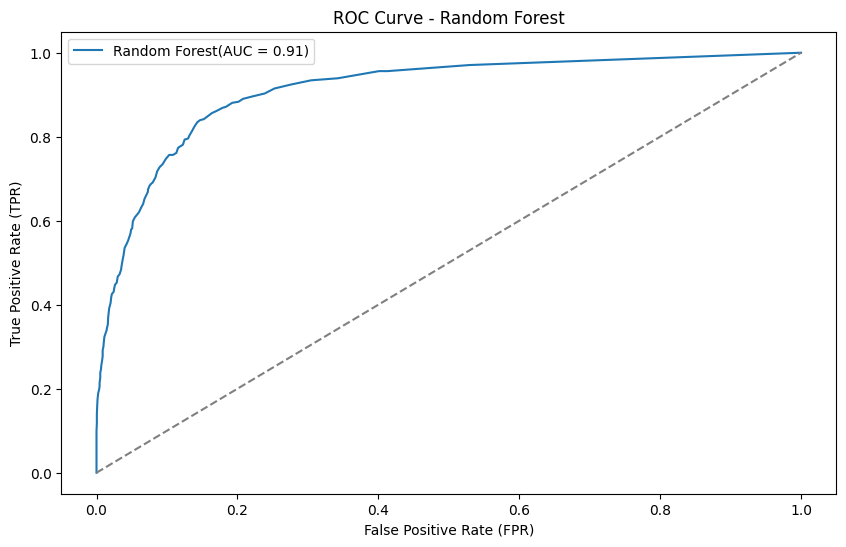

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("/content/online_shoppers_intention.csv")

# Encode categorical variables
label_encoder = LabelEncoder()

# Encoding the 'Month' column (Month is a categorical variable)
data['Month'] = label_encoder.fit_transform(data['Month'])

# Encoding 'VisitorType' and 'Weekend' (boolean or categorical variables)
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Weekend'] = data['Weekend'].astype(int)  # Convertir 'Weekend' en entier (0 ou 1)

# Separate features and target variable
X = data[['PageValues', 'BounceRates', 'ProductRelated_Duration', 'Administrative', 'Month', 'Weekend', 'SpecialDay', 'VisitorType']]
y = data['Revenue']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Evaluation - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest(AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()


**The random forest model** shows an overall accuracy of 89%, indicating good classification of instances. It excels in detecting non-buyers ("False") with a precision of 92%, recall of 95%, and an F1-score of 93%. However, it performs weaker for the "True" class (buyers), with a precision of 71%, recall of 56%, and an F1-score of 63%, suggesting difficulty in identifying potential buyers. The AUROC of 0.91 confirms the model's good overall performance but highlights a class imbalance. Techniques like resampling or cost-sensitive learning could improve buyer detection and boost sales.

**The random** forest model provides better overall performance (with higher accuracy and AUC), making it a powerful tool for prediction and customer segmentation based on purchase probability. However, in the specific context of this project, where the main goal is to understand how variables influence revenue to guide strategic and operational actions, logistic regression proves to be more suitable. Its transparency allows for the clear identification of key factors influencing purchase decisions, thus facilitating the development of actionable recommendations. Additionally, logistic regression is easier to understand and explain, making it more accessible to marketing teams, especially novices. For these reasons, it is better suited for this project.

**CONCLUSION** - **How do factors influence behavior and purchase decisions on a website?**








**The analysis** highlights several key factors influencing online visits and purchase behaviors. First, temporal variables play a significant role: visits and generated revenue vary by month, with higher activity observed during weekdays compared to weekends, while special days showed no notable impact on purchases. New visitors also stand out with a higher conversion rate compared to returning visitors, emphasizing the importance of a balanced strategy combining new customer acquisition with the retention of existing visitors. Additionally, web metrics such as bounce rates, administrative session durations, and values associated with pages and products directly influence revenue. Visits that generate purchases exhibit distinct behaviors on these indicators compared to visits with no revenue.

Beyond the current analysis, several interesting perspectives should be explored. For instance, integrating geographical data could reveal regional variations in shopping habits, while studying traffic types could help identify the most effective sources for attracting visitors.

**In conclusion**, to maximize website performance, it is essential to optimize the user experience, reduce bounce rates, highlight high-value pages, and design personalized campaigns based on in-depth customer segmentation. By combining these actions with further research, the company will not only increase its revenue but also improve its return on investment while more effectively addressing customer needs.

**Finally,** in the context of this project, where the goal is to facilitate understanding for marketing teams, logistic regression, due to its simplicity and transparency, remains the most suitable model for providing actionable and practical recommendations.